# Module1: Downloading a dataset from GEO (Gene Expression Omnibus) database

### Step 1: Setup and Imports

#### Import Required Libraries

First, we need to import the necessary libraries for downloading and handling the data.

- `requests`: To download data from the web.
- `pandas`: To handle data in a DataFrame.
- `os`: To handle directory operations.

In [5]:
# Step 1: Import Required Libraries
import requests
import pandas as pd
import os

### Step 2: Define the Download Function

#### Define the Download Function

Next, we'll define a function `download_geo_data` that will handle downloading the GEO dataset. 

- The function takes two arguments: `geo_id` and `output_path`.
- It constructs the URL based on the provided `geo_id`.
- It then makes a GET request to download the data.
- If the request is successful, it saves the downloaded file to the specified `output_path`.


In [2]:
def download_geo_data(geo_id, output_path):
    url = f"https://ftp.ncbi.nlm.nih.gov/geo/series/{geo_id[:-3]}nnn/{geo_id}/matrix/{geo_id}_series_matrix.txt.gz"
    response = requests.get(url)
    
    if response.status_code == 200:
        with open(f"{output_path}/{geo_id}_series_matrix.txt.gz", 'wb') as f:
            f.write(response.content)
        print(f"Data downloaded and saved to {output_path}")
    else:
        print("Failed to download data")

### Step 3: Set Variables and Create Directory

#### Set Variables and Create Directory

- Define the GEO Series ID (`geo_id`) and the path where the data will be saved (`output_path`).
- Ensure the output directory exists using `os.makedirs`.


In [6]:
# GSE10072 contains gene expression data related to the response of colorectal cancer cells to different anti-cancer drug treatments
# This dataset includes gene expression profiles of colorectal cancer cells (HCT116) treated with various compounds, including 5-fluorouracil (5-FU), oxaliplatin, and SN-38 (the active metabolite of irinotecan)
geo_id = "GSE10072"  # Example GEO Series ID
output_path = "data"

# Create the directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

### Step 4: Download the Data

#### Download the Data

- Call the `download_geo_data` function with the defined `geo_id` and `output_path`.


In [7]:
download_geo_data(geo_id, output_path)

Data downloaded and saved to data


### Step 5: Load Data into a DataFrame

#### Load the Data into a pandas DataFrame

- Define the path to the downloaded file.
- Check if the file exists.
- If the file exists, load the data into a pandas DataFrame.

In [8]:
file_path = os.path.join(output_path, f"{geo_id}_series_matrix.txt.gz")

# Check if the file exists
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep='\t', comment='!', compression='gzip', low_memory=False)
    print("Data loaded into DataFrame")
else:
    print("File not found")

Data loaded into DataFrame


### Step 6: Display the Data

#### Display the Data

- Display the first few rows of the DataFrame to ensure the data has been loaded correctly.

In [9]:
df.head()

,ID_REF,GSM254625,GSM254626,GSM254627,GSM254628,GSM254629,GSM254630,GSM254631,GSM254632,GSM254633,...,GSM254722,GSM254723,GSM254724,GSM254725,GSM254726,GSM254727,GSM254728,GSM254729,GSM254730,GSM254731
0,1007_s_at,10.927084,10.416978,10.628538,10.151180,10.988512,10.778205,10.568814,10.479425,10.548843,...,10.727493,10.740353,10.527962,10.193615,10.768815,10.467693,10.902778,10.869402,10.292285,10.407218
1,1053_at,6.895217,6.924856,7.550245,6.699557,6.826031,6.718372,6.739765,6.724615,7.102475,...,6.856575,6.737879,6.959032,7.008578,6.740444,6.795750,6.838162,6.628363,6.794050,6.358410
2,117_at,8.110190,7.760228,7.974676,7.712676,7.775592,7.777087,7.893210,8.058398,8.005438,...,7.741922,7.805107,8.093078,8.144760,8.159483,7.855457,8.010428,7.889019,8.163266,7.973844
3,121_at,9.451286,9.520943,9.807597,9.522087,9.855061,9.861055,10.126183,9.878970,10.110318,...,10.089149,10.007059,9.832610,10.107004,9.790645,9.645239,9.871851,9.867988,9.824801,9.850144
4,1255_g_at,4.814477,4.718640,4.905163,4.818076,4.823958,4.848313,5.125956,5.037979,4.889936,...,5.048391,4.758050,4.900470,4.948760,4.609322,4.759571,4.788774,4.967626,4.817474,5.128892


# Module 2: Data Preprocessing -  compute the average expression level of each gene across the samples

### Step 1: Import Required Libraries

#### Import the necessary libraries for data processing.

- `numpy`: To perform numerical operations.

In [24]:
import pandas as pd
import os

### Step 2: Define the Normalization Function

####  Define the Average Calculation Function

Define a function `calculate_average_expression` to compute the average expression level for each gene.

- The function takes a DataFrame as input and returns a DataFrame with the average expression levels.

In [25]:
def calculate_average_expression(df):
    expression_columns = df.columns[1:]  # Assuming the first column is not expression data
    df[expression_columns] = df[expression_columns].apply(pd.to_numeric, errors='coerce')
    df['average_expression'] = df[expression_columns].mean(axis=1)
    return df[['ID_REF', 'average_expression']]

### Step 3: Calculate the average function

#### Calculate the average function

Use the `calculate_average_expression` function to compute the average expression levels.

In [26]:
df_avg_expression = calculate_average_expression(df.copy())

### Step 4: Save the Average Expression Data

### Save the Average Expression data

Save the average expression data to a new file for future use

In [27]:
avg_expression_file_path = os.path.join(output_path, f"{geo_id}_average_expression.csv")
df_avg_expression.to_csv(avg_expression_file_path, index=False)
print(f"Average expression data saved to {avg_expression_file_path}")

Average expression data saved to data\GSE10072_average_expression.csv


### Step 5: Display the Average Expression  Data

#### Display the Average Expression Data

Display the first few rows of the average expression DataFrame to ensure the calculation is correct.



In [29]:
df_avg_expression.head()

,ID_REF,average_expression
0,1007_s_at,10.560596
1,1053_at,6.872995
2,117_at,8.012540
3,121_at,9.871100
4,1255_g_at,4.892962


# Module 3: Data Visualization

### Step 1: Import Required Libraries

Import the necessary libraries for data visualization.

- `matplotlib` and `seaborn`: For creating plots and visualizations.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the  Average expression data

Load the normalized gene expression data from the previously saved file.Load the average expression data from the previously saved file.

In [30]:
avg_expression_file_path = os.path.join(output_path, f"{geo_id}_average_expression.csv")
df_avg_expression = pd.read_csv(avg_expression_file_path)

### Step 3: Create a Bar Plot

Create a heatmap to visualize the average gene expression levels of the top 20 genes with the highest average expression.
- Use `seaborn.heatmap` to create the heatmap.

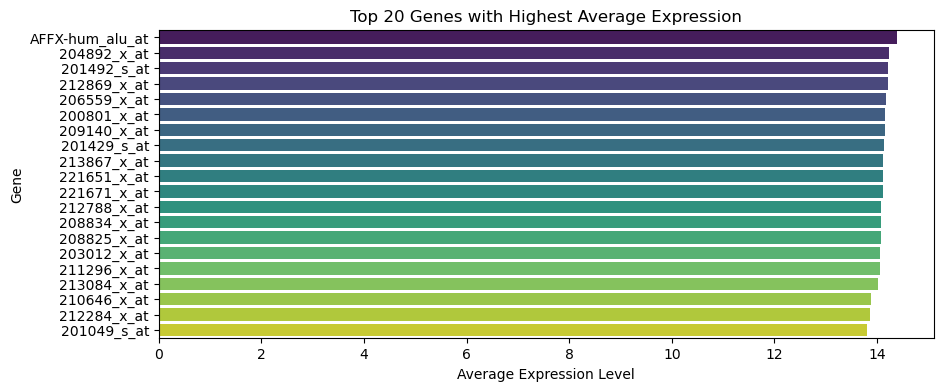

In [35]:
top_genes = df_avg_expression.nlargest(20, 'average_expression')

plt.figure(figsize=(10, 4))
sns.barplot(x='average_expression', y='ID_REF', data=top_genes, palette='viridis')
plt.title('Top 20 Genes with Highest Average Expression')
plt.xlabel('Average Expression Level')
plt.ylabel('Gene')
plt.show()

### Step 4:  Save the Bar Plot

Save the Bar plot to a file.

In [36]:
barplot_file_path = os.path.join(output_path, 'barplot_average_expression.png')
plt.savefig(barplot_file_path)
print(f"Bar plot saved to {barplot_file_path}")

Bar plot saved to data\barplot_average_expression.png


<Figure size 640x480 with 0 Axes>